<a href="https://colab.research.google.com/github/k2moon/ml-hg/blob/main/hg_04_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä logistic regression
---


## ÌïµÏã¨ ÌÇ§ÏõåÎìú
---

- Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä
- Îã§Ï§ë Î∂ÑÎ•ò
- ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®Ïàò
- ÏÜåÌîÑÌä∏Îß•Ïä§ Ìï®Ïàò

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Íµ¨Í∏Ä ÏΩîÎû©ÏóêÏÑú Ïã§ÌñâÌïòÍ∏∞</a>
  </td>
</table>

## ÌôïÎ•†Î°ú Î∂ÑÎ•ò ÌïòÍ∏∞
---


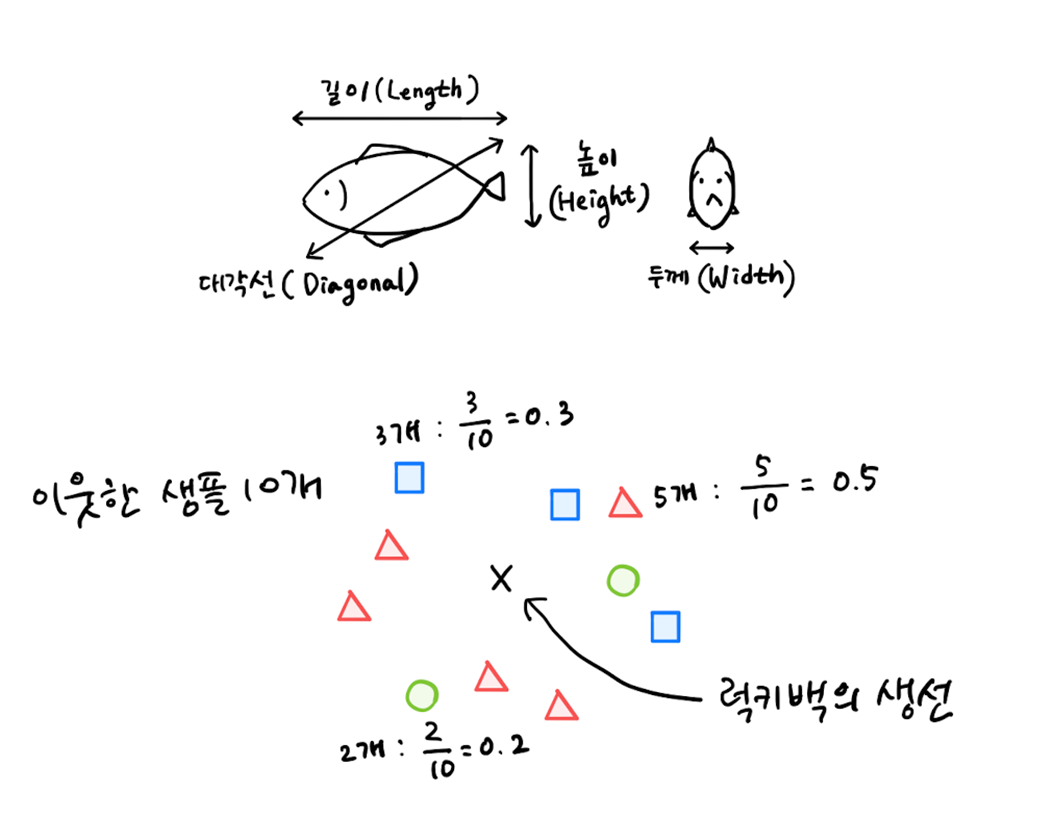

- KNN Ïù¥ÏõÉÏùò ÌÅ¥ÎûòÏä§ ÎπÑÏú® Í≥ÑÏÇ∞Ìï¥ÏÑú ÌôïÎ•†Î°ú Ï∂úÎ†•

### Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑÌïòÍ∏∞
---

- 7Ï¢ÖÎ•òÏùò ÏÉùÏÑ†Ïùò Î¨¥Í≤å, Í∏∏Ïù¥, ÎÜíÏù¥, ÎëêÍªò, ÎåÄÍ∞ÅÏÑ† ÌäπÏÑ± ÏÇ¨Ïö©

In [4]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340

In [5]:
# ÏÉùÏÑ†Ïùò Ï¢ÖÎ•ò Ï∂îÏ∂ú :  Target
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [6]:
# Target Ï†úÏô∏Ìïú Ïó¥ ÏÑ†ÌÉù
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_input.shape

(159, 5)

In [7]:
# 5Ï§Ñ ÌôïÏù∏
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [8]:
# Target ÏÉùÏÑ±, 1Ï∞®Ïõê
fish_target = fish['Species'].to_numpy()
fish_target.shape

(159,)

In [9]:
# ÌõàÎ†® ÏÑ∏Ìä∏ÏôÄ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ ÏÉùÏÑ±
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [10]:
# ÌëúÏ§ÄÌôî : ÌõàÎ†® ÏÑ∏Ìä∏Ïùò ÌÜµÍ≥ÑÍ∞íÏúºÎ°ú ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ Î≥ÄÌôò
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### k-ÏµúÍ∑ºÏ†ë Ïù¥ÏõÉ Î∂ÑÎ•òÍ∏∞Ïùò ÌôïÎ•† ÏòàÏ∏°
---
- k=3 ÏßÄÏ†ï
- ÌÉÄÍπÉÏù¥ 7Í∞úÏù∏ ÌÅ¥ÎûòÏä§ Î∂ÑÎ•ò : Îã§Ï§ë Î∂ÑÎ•ò multi-class classification

In [11]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


### ÏòàÏ∏° ÌôïÎ•† predict_proba()
---
- ÏÇ¨Ïù¥ÌÇ∑Îü∞ÏùÄ Î¨∏ÏûêÏó¥ ÌÉÄÍπÉ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö© Í∞ÄÎä•, Îã®, ÏïåÌååÎ≤≥ ÏàúÏúºÎ°ú  Ï†ïÎ†¨ Îê®
- .classes_ ÏÜçÏÑ±Ïóê Ï†ÄÏû•ÎêòÏñ¥ ÏûàÏùå
- ÏÇ¨Ïù¥ÌÇ∑Îü∞Ïùò Î∂ÑÎ•ò Î™®Îç∏ÏùÄ predict_proba() Î©îÏÜåÎìúÎ°ú ÌÅ¥ÎûòÏä§Î≥Ñ ÌôïÎ•†Í∞í Î∞òÌôò
- ÏòàÏ∏° ÌôïÎ•†Í∞í ÏàúÏÑúÎäî class_ ÏÜçÏÑ± ÏàúÏÑú

In [12]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [13]:
# ÏòàÏ∏° Í∞í ÌôïÏù∏
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [14]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [15]:
# 4Î≤àÏß∏ ÏÉòÌîå Ïù¥ÏõÉ ÌÅ¥ÎûòÏä§ ÌôïÏù∏ : 0.6667 
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


## Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä
---
- Ïù¥Î¶ÑÏùÄ ÌöåÍ∑ÄÏù¥ÏßÄÎßå Î∂ÑÎ•ò Î™®Îç∏
- ÏÑ†Ìòï ÌöåÍ∑ÄÏôÄ ÎèôÏùºÌïòÍ≤å ÏÑ†Ìòï Î∞©Ï†ïÏãù ÌïôÏäµ
- z = a x (Weight) + b x (Length) + c x (Diagonal) + d x (Height) + e x (Width) + f
- zÏùò Í∞íÏù¥ ÌôïÎ•†Ïù¥ ÎêòÏñ¥Ïïº Ìï® => 0 ~ 1
- z < -Î¨¥ÌïúÎåÄ => 0, z > +Î¨¥ÌïúÎåÄ => 1


### ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®Ïàò sigmoid function
---
- SÏûêÌòï Í≥°ÏÑ† ÎòêÎäî ÏãúÍ∑∏Î™®Ïù¥Îìú Í≥°ÏÑ†ÏùÑ Í∞ñÎäî ÏàòÌïô Ìï®Ïàò

**Î°úÏßÄÏä§Ìã± Ìï®Ïàò logistic function**

> **$ S(z) = \frac{1}{1 + e^{-z}} = \frac{e^{z}}{e^z + 1} $**
 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)

### ÌôúÏÑ±Ìôî Ìï®Ïàò
---
- Ïó¨Îü¨ Ï¢ÖÎ•òÏùò ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®ÏàòÎäî Ïù∏Í≥µ Îâ¥Îü∞Ïùò ÌôúÏÑ±Ìôî Ìï®ÏàòÎ°ú ÏÇ¨Ïö© Îê®

![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Gjl-t%28x%29.svg/1024px-Gjl-t%28x%29.svg.png)

- Ï∞∏Í≥† ÏÇ¨Ïù¥Ìä∏ :  https://tinyurl.com/cmemcv6w

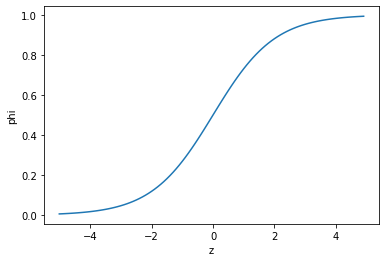

In [16]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ°ú Ïù¥ÏßÑ Î∂ÑÎ•ò ÏàòÌñâÌïòÍ∏∞

In [19]:
# Numpy Î∞∞Ïó¥ : Î∂àÎ¶¨Ïñ∏ Ïù∏Îç±Ïã± boolean indexing
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [20]:
# Ïù¥ÏßÑ Î∂ÑÎ•ò Ïó∞ÏäµÏùÑ ÏúÑÌï¥ ÎèÑÎØ∏ BreamÏôÄ ÎπôÏñ¥ Smelt Îßå Ï∂îÏ∂ú
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [21]:
# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÌõàÎ†®
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [22]:
# 5Í∞ú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [24]:
# predict_proba() Î°ú ÏòàÏ∏° ÌôïÎ•† ÌôïÏù∏, [ÏùåÏÑ± ÌÅ¥ÎûòÏä§(0) ÌôïÎ•†, ÏñëÏÑ± ÌÅ¥ÎûòÏä§(1) ÌôïÎ•†] 
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [25]:
# [ÏùåÏÑ± ÌÅ¥ÎûòÏä§(0,  Bream), ÏñëÏÑ± ÌÅ¥ÎûòÏä§(1, Smelt)]  
print(lr.classes_)

['Bream' 'Smelt']


In [26]:
# ÌöåÍ∑Ä Í≥ÑÏàò ÌôïÏù∏ 
# ùëß = ‚àí0.404 √ó Î¨¥Í≤å ‚àí 0.576 √ó Í∏∏Ïù¥ ‚àí 0.663 √ó ÎåÄÍ∞ÅÏÑ† ‚àí 0.013 √ó ÎÜíÏù¥ ‚àí 0.732 √ó ÎëêÍªò ‚àí 2.161
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [27]:
# decision_function() ÏúºÎ°ú z Í∞í ÌôïÏù∏ => Ïù¥ Í∞íÏùÑ ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®ÏàòÏóê ÎÑ£ÏúºÎ©¥ ÌôïÎ•† Í≥ÑÏÇ∞ Îê®
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
# Ïã§Ï†ú ÏñëÏÑ± ÌÅ¥ÎûòÏä§ ÌôïÎ•† Í≥ÑÏÇ∞ Ìï¥ Î≥¥Í∏∞
# ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®Ïàò : scipy Î™®ÎìàÏùò expit()
from scipy.special import expit

print(expit(decisions))

### LogisticRegression ÌÅ¥ÎûòÏä§
---
- Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Î∞òÎ≥µÏ†ÅÏù∏ ÏïåÍ≥†Î¶¨Ï¶ò ÏÇ¨Ïö©
- max_iter Îß§Í∞úÎ≥ÄÏàòÎ°ú Î∞òÎ≥µ ÌöüÏàò ÏßÄÏ†ï, Í∏∞Î≥∏ 100Ìöå
- Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Î¶øÏßÄ ÌöåÍ∑ÄÏôÄ Í∞ôÏù¥ L2 Í∑úÏ†ú ÏÇ¨Ïö©
- Í∑úÏ†ú Ï†úÏñ¥ Î≥ÄÏàò C : Î¶øÏßÄÏùò alpha Í∞íÍ≥º Î∞òÎåÄÎ°ú Í∞íÏù¥ ÏûëÏùÑ ÏàòÎ°ù Í∑úÏ†úÍ∞Ä Í∞ïÌï¥Ïßê, Í∏∞Î≥∏Í∞í 1

### Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ°ú Îã§Ï§ë Î∂ÑÎ•ò ÏàòÌñâÌïòÍ∏∞
---
- C=20, max_iter=1000ÏúºÎ°ú ÌõàÎ†® ÏàòÌñâ

In [30]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [31]:
# ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ 5Í∞ú ÏòàÏ∏°
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [33]:
# ÏòàÏ∏° ÌôïÎ•† ÌôïÏù∏ predict_proba()
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [34]:
# ÌÉÄÍ≤ü ÌôïÏù∏ classes_ ÏÜçÏÑ±
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [35]:
# ÏÑ†Ìòï Î∞©Ï†ÅÏãù Í∞í ÌôïÏù∏
# 5Í∞úÏùò ÌäπÏÑ±ÏùÑ ÏÇ¨Ïö©ÌïòÎØÄÎ°ú Ïó¥ÏùÄ 5Í∞ú
# 7Í∞úÏùò ÌÉÄÍπÉÏùÑ Í≥ÑÏÇ∞Ìï¥Ïïº ÌïòÎØÄÎ°ú z Í∞íÏùÄ 7Í∞ú
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


### ÏÜåÌîÑÌä∏Îß•Ïä§ Ìï®Ïàò softmax function
---
- Ïù¥ÏßÑ Î∂ÑÎ•òÎäî ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®ÏàòÎ•º Ïù¥Ïö©Ìï¥ÏÑú zÎ•º 0Í≥º 1ÏÇ¨Ïù¥Î°ú Î≥ÄÌôò
- Îã§Ï§ë Î∂ÑÎ•òÎäî Ïó¨Îü¨Í∞úÏùò ÏÑ†Ìòï Î∞©Ï†ïÏãùÏùò Ï∂úÎ†•Í∞íÏùÑ 0 ~ 1 ÏÇ¨Ïù¥Î°ú ÏïïÏ∂ï ÌïòÍ≥† Ï†ÑÏ≤¥ Ìï©Ïù¥ 1Ïù¥ ÎêòÎèÑÎ°ù ÎßåÎìúÎäî Ï†ïÍ∑úÌôîÎêú ÏßÄÏàò Ìï®Ïàò

> **$ y_k = \frac{exp(a_k)}{{\displaystyle\sum_{i=1}^n}exp(a_i)} $**

> **$ esum = e^{z1} + e^{z2} + ... + e^{z7} $**

> **$ s1 = \frac{e^{z1}}{esum} , s2 = \frac{e^{z2}}{esum} , ... , s7 = \frac{e^{z7}}{esum} $**

In [36]:
# z1 ~ z7 ÍπåÏßÄÏùò Í∞í ÌôïÏù∏ decision_function()
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [37]:
# scipy Î™®Îìà softmax() Ìï®Î°ú Í≥ÑÏÇ∞ Ìï¥Î≥¥Í∏∞
# axist=1 Ïó¥Î∞©Ìñ• Ï∂ï ÏßÄÏ†ï
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbcNHRR%2FbtqBPXmTZBh%2FOjPe56tF5LWmQChuKZgPa0%2Fimg.png)